In [1]:
import numpy as np
import vaex as vx
import pylab
ds = vx.open("/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5")
#server = vx.server("localhost")
#ds = server.open("Aq-A-2-999-shuffled-10percent")
%matplotlib inline

/Users/users/breddels/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
DEBUG:vaex:trying '/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.Zeldovich'>
DEBUG:vaex:trying '/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5' with class <class 'vaex.dataset.Hdf5MemoryMapped'>
DEBUG:vaex:can open!


Simplest example
=========
The default for plot is to calculate the mean +/- 3 sigma for the limits, and plot the density plot

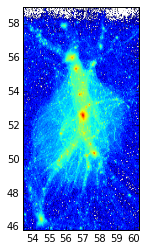

In [2]:
subspace = ds("x", "y")
subspace.plot(f=np.log)

More control
============
For more control, you can find the limits yourself, with minmax or limits_sigma, do the histogram, and let vaex handle the plotting.

Vaex uses matplotlib, so any matplotlib routines before and afterwards are fine.

In [3]:
limits = subspace.limits_sigma(square=True, sigmas=0.4)
means = subspace.mean()
print "limits", limits

limits [[ 56.19837645  57.5324333 ]
 [ 51.75000099  53.08405784]]


In [4]:
grid = subspace.histogram(size=256, limits=limits)

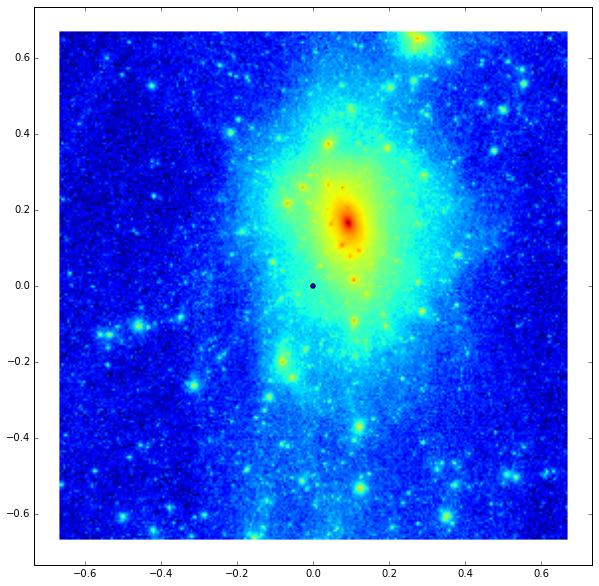

In [5]:
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log10(grid+1), limits, center=means)
pylab.scatter(0, 0)

More control
======
Extra keywords will be passed to pylab.imshow, such as cmap for the colormap

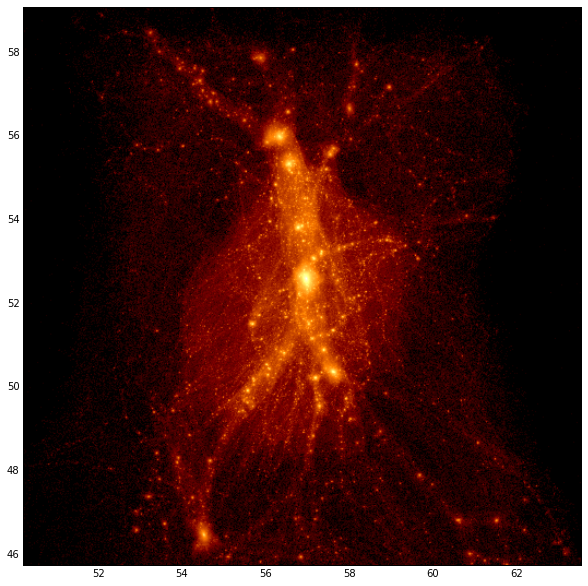

In [6]:
limits = subspace.limits_sigma(sigmas=4, square=True)
grid = subspace.histogram(size=512, limits=limits)
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(grid, limits=limits, f=np.log1p, cmap='afmhot')

In [7]:
#reload_ext autoreload
%load_ext autoreload
%autoreload 2


Selections
==========
Selections can be done using expressions as well. To use the selection, use subspace.selected()

In [8]:
ds.select("(z<48)")
selected = subspace.selected()
grid_masked1 = selected.histogram(size=512, limits=limits)
ds.select("(z>50)")
grid_masked2 = selected.histogram(size=512, limits=limits)


Setting mask
Setting mask


<matplotlib.contour.QuadContourSet instance at 0x2b14a174c440>

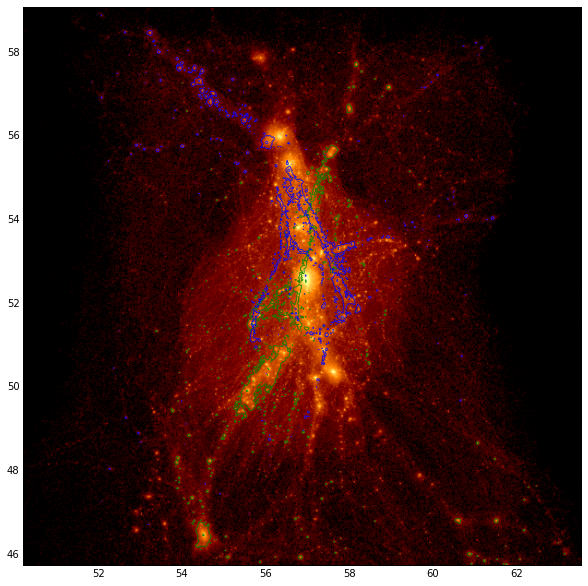

In [9]:
cmap = 'afmhot'
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log(grid+1), limits=limits, cmap=cmap, alpha=1.0)
#subspace.plot(np.log(grid_masked), limits=limits, cmap=cmap, alpha=0.5)
pylab.contour(np.log(grid_masked1), 2, extent=np.array(limits).flatten(), alpha=0.8, colors="green")
pylab.contour(np.log(grid_masked2), 2, linewidth="2pt", colors="blue", extent=np.array(limits).flatten(), alpha=0.8)

In [22]:
subspace = ds("x", "y")

In [12]:
subspace.mean()

array([ 56.86512294,  52.41711999])